In [1]:
%load_ext autoreload
%autoreload 2

from math import ceil

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from plot_twist.silhouette_diagram import silhouette_diagram

In [2]:
# Define the centers of the clusters
blob_centers = np.array(
    [
        [0.2, 2.3],
        [-1.5, 2.3],
        [-2.8, 1.8],
        [-2.8, 2.8],
        [-2.8, 1.3],
    ]
)
# Standard deviations for each cluster
blob_std = np.array(
    [
        0.4,
        0.3,
        0.1,
        0.1,
        0.1,
    ]
)
# Generate blob dataset with specified centers and standard deviations
X, y = make_blobs(
    n_samples=2000,
    centers=blob_centers,
    cluster_std=blob_std,
    random_state=7,
)

In [3]:
k_list = range(2, 8)
models = []

for k in k_list:
    # Fit KMeans model for each k
    model = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=42,
    ).fit(X)
    # Get predicted labels
    y_pred = model.labels_
    # Calculate silhouette coefficients for each sample
    coefficients = silhouette_samples(X, y_pred)
    # Calculate silhouette score for model
    score = silhouette_score(X, y_pred)
    # Append model results
    models.append([k, y_pred, coefficients, score])

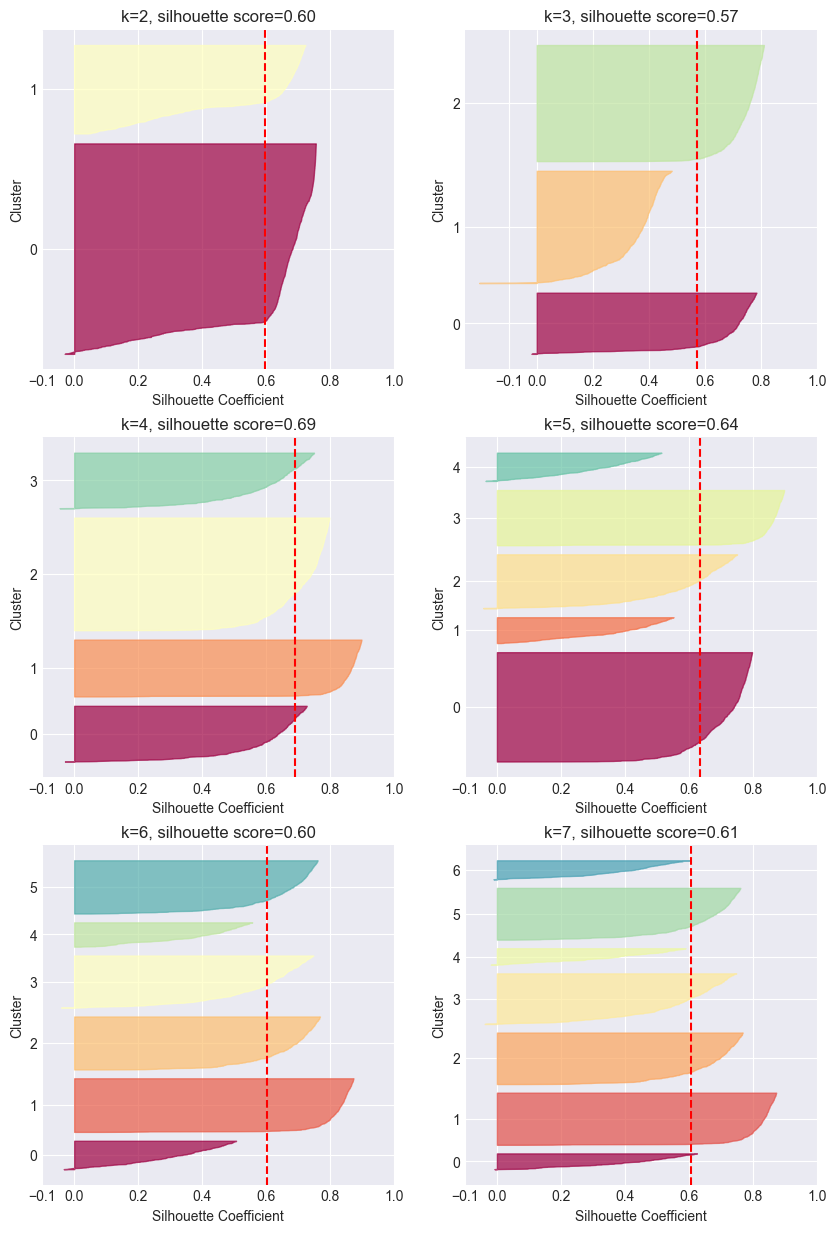

In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

_, axes = plt.subplots(ceil(len(k_list) / 2), 2, figsize=(10, 15))

for ax, (
    k,
    y_pred,
    silhouette_coefficients,
    silhouette_score,
) in zip(axes.flatten(), models):
    silhouette_diagram(
        k,
        y_pred,
        silhouette_coefficients,
        silhouette_score,
        ax,
    )
    ax.set_title(f"k={k}, silhouette score={silhouette_score:.2f}")